In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import tqdm as tqdm
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [ ]:
pca_df = pd.read_csv('wine.csv')
pca_df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
pca_var=PCA()
pca_var.fit(pca_df)

PCA()

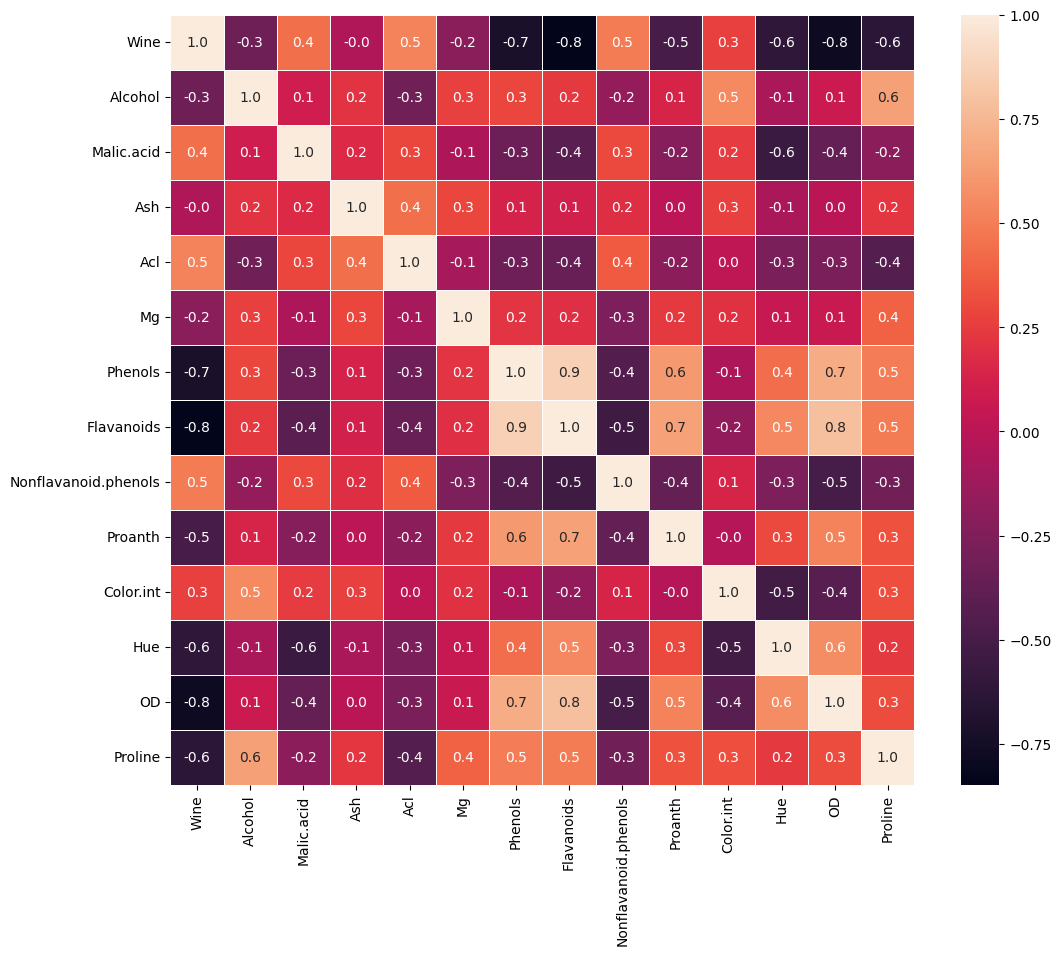

In [ ]:
f,ax = plt.subplots(figsize=(12,10))
sns.heatmap(pca_df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

#PCA on standardized data

In [ ]:
#Applying standard scalar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pca_df)
scaled_data.shape

(178, 14)

(0.0, 1.1)

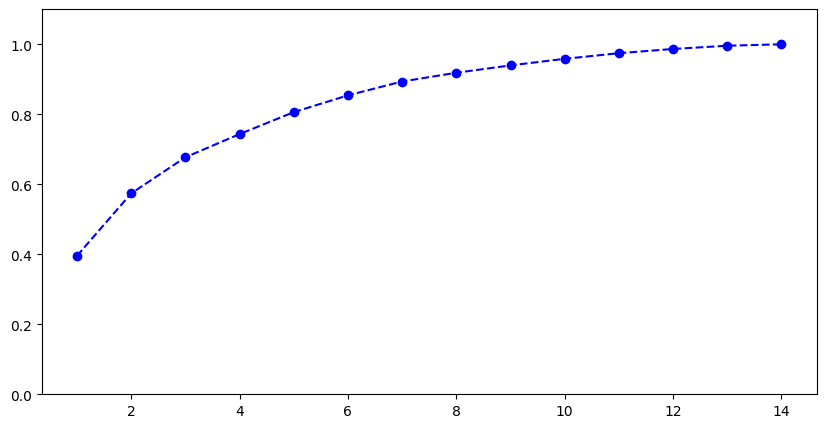

In [ ]:
pca_var=PCA()
pca_var.fit(scaled_data)

plt.figure(figsize=(10,5))
x1=np.arange(1,1+scaled_data.shape[1],step=1)
y1=np.cumsum(pca_var.explained_variance_ratio_)
plt.plot(x1,y1,marker='o',linestyle='--',color='b')
plt.ylim(0.0,1.1)

In [ ]:
#Amount of variance by each principal component
pca_var.explained_variance_ratio_

array([0.39542486, 0.17836259, 0.10329102, 0.06627984, 0.06267875,
       0.0480556 , 0.03955707, 0.02500244, 0.02103871, 0.01873615,
       0.01613203, 0.01205691, 0.00925458, 0.00412945])

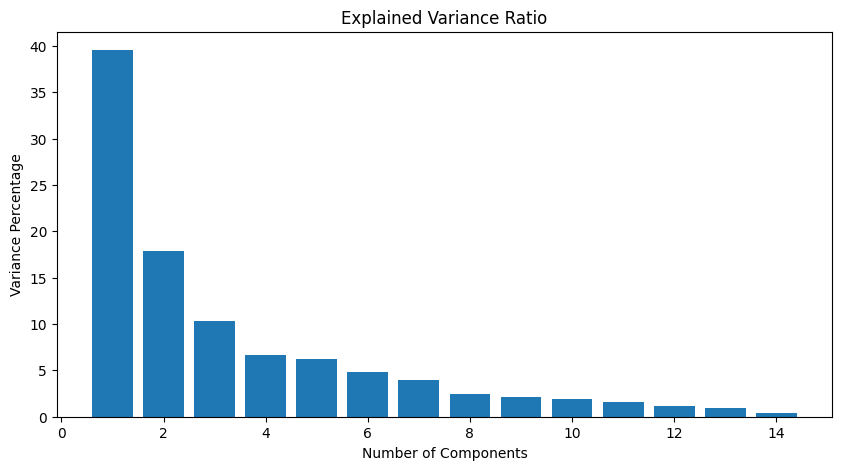

In [ ]:
#PLOT A BAR PLOT FOR THE EXPLAINED VARIANCE RATIO AS NUMBER OF COMPONENTS VS VARIANCE PERCENTAGE

plt.figure(figsize=(10, 5))
plt.bar(range(1, len(pca_var.explained_variance_ratio_) + 1), pca_var.explained_variance_ratio_ * 100)
plt.xlabel('Number of Components')
plt.ylabel('Variance Percentage')
plt.title('Explained Variance Ratio')
plt.show()

In [ ]:
  #Applying min max-scaler on data

In [ ]:
#cumulative

In [ ]:
var1=np.cumsum(np.round(pca_var.explained_variance_ratio_, decimals=4)*100)
var1

array([ 39.54,  57.38,  67.71,  74.34,  80.61,  85.42,  89.38,  91.88,
        93.98,  95.85,  97.46,  98.67,  99.6 , 100.01])

In [ ]:
pca=PCA(n_components=3)
pca_data=pca.fit_transform(scaled_data)

#convert to dataframe
pca_scaled_data=pd.DataFrame(pca_data,columns=['PC1','PC2','PC3'])
print(pca_scaled_data.shape)
print(pca_scaled_data.head())

(178, 3)
        PC1       PC2       PC3
0 -3.522934  1.453098 -0.164795
1 -2.528858 -0.330019 -2.026707
2 -2.785029  1.036936  0.983238
3 -3.922588  2.768210 -0.174968
4 -1.407511  0.867773  2.025829


In [ ]:

# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(np.cov(scaled_data.T))

# Print eigenvalues and eigenvectors
print("Eigenvalues:")
print(eigenvalues)
print("\nEigenvectors:")
print(eigenvectors)

Eigenvalues:
[5.56722458 2.51118402 1.45424413 0.9331603  0.88246016 0.67657935
 0.55692777 0.05813894 0.13029618 0.35201176 0.16975037 0.29620602
 0.26378805 0.2271244 ]

Eigenvectors:
[[-0.39366953 -0.00569041 -0.00121795 -0.12246373 -0.15758395  0.20033864
   0.05938234 -0.66904528  0.49224318  0.07179553  0.01575769 -0.16236882
  -0.19899373  0.01444169]
 [ 0.13632501 -0.48416087  0.20740081  0.08191848  0.25089415 -0.13517139
   0.09269887 -0.09062605  0.05610645  0.42154435 -0.26411262 -0.45019071
   0.31127983 -0.22154641]
 [-0.22267638 -0.22359095 -0.08879606 -0.46988824  0.18860015 -0.59841948
  -0.3743698   0.02522531 -0.06675544  0.08757556  0.1192121  -0.00602569
  -0.32592413  0.06839251]
 [ 0.00225793 -0.31585588 -0.62610236  0.24984122  0.0935236  -0.10799983
   0.16708856  0.00163582  0.19201787 -0.17208034 -0.04502305  0.26249446
  -0.12452347 -0.49452428]
 [-0.22429849  0.01161574 -0.6119896  -0.07199322 -0.0465675   0.08811224
   0.26872469  0.09536107 -0.20007784  0